Lynn Slutsky
Property Data Analysis
________________________________________________________
## Introduction
________________________________________________________

My analysis is to find the best place to live in Pittsburgh. This metric is therefore the cheapest neighborhood. I analyzed property data, specifically sale price of residential property to find the best neighborhood for this submetric.

Link to dataset:
https://data.wprdc.org/dataset/property-data-with-geographic-identifiers/resource/8eff881d-4d28-4064-83f1-30cc991cfec7
https://data.wprdc.org/datastore/dump/8eff881d-4d28-4064-83f1-30cc991cfec7

In [12]:
#import relevant libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import scipy.stats as stats

#load data
#only includining id, classdesc, saleprice, saledesc, and neighborhood
property_data = pd.read_csv("property_data_pittsburgh_wprdc.csv", 
                                       index_col="_id", usecols=[0,25,35,37,88], low_memory=False) # use the column named _id as the row index


In [13]:
#to give an idea of what my data looks like:
property_data.head(10) #first 10 rows

,CLASSDESC,SALEPRICE,SALEDESC,NEIGHBORHOOD
_id,,,,
1,RESIDENTIAL,699000.0,QUIT CLAIM / SPEC WARRNTY,Central Business District
2,RESIDENTIAL,350000.0,SALE NOT ANALYZ,Central Business District
3,RESIDENTIAL,265000.0,OTHER VALID,Central Business District
4,RESIDENTIAL,25550.0,OTHER,Bluff
19,COMMERCIAL,0.0,LOVE&AFFECTION,Bluff
5,RESIDENTIAL,45550.0,OTHER,Bluff
6,COMMERCIAL,85000.0,OTHER INVALID,Bluff
7,COMMERCIAL,250000.0,MULTI-PARCEL SA,Bluff
8,COMMERCIAL,113000.0,VALID SALE,Bluff


## Property Data Analysis

Original Data Counts:
value counts 
 Brookline              5270
Carrick                3827
Squirrel Hill South    3794
Mount Washington       3617
Beechview              3454
                       ... 
South Shore             145
Northview Heights        84
Glen Hazel               58
Allegheny Center         51
Arlington Heights         8
Name: NEIGHBORHOOD, Length: 91, dtype: int64

 Residential value counts: 
value counts 
 Brookline              3185
Squirrel Hill South    2557
Mount Washington       2310
Carrick                2286
Shadyside              2005
                       ... 
Glen Hazel               25
Northview Heights        19
North Shore               8
South Shore               4
Arlington Heights         1
Name: NEIGHBORHOOD, Length: 89, dtype: int64


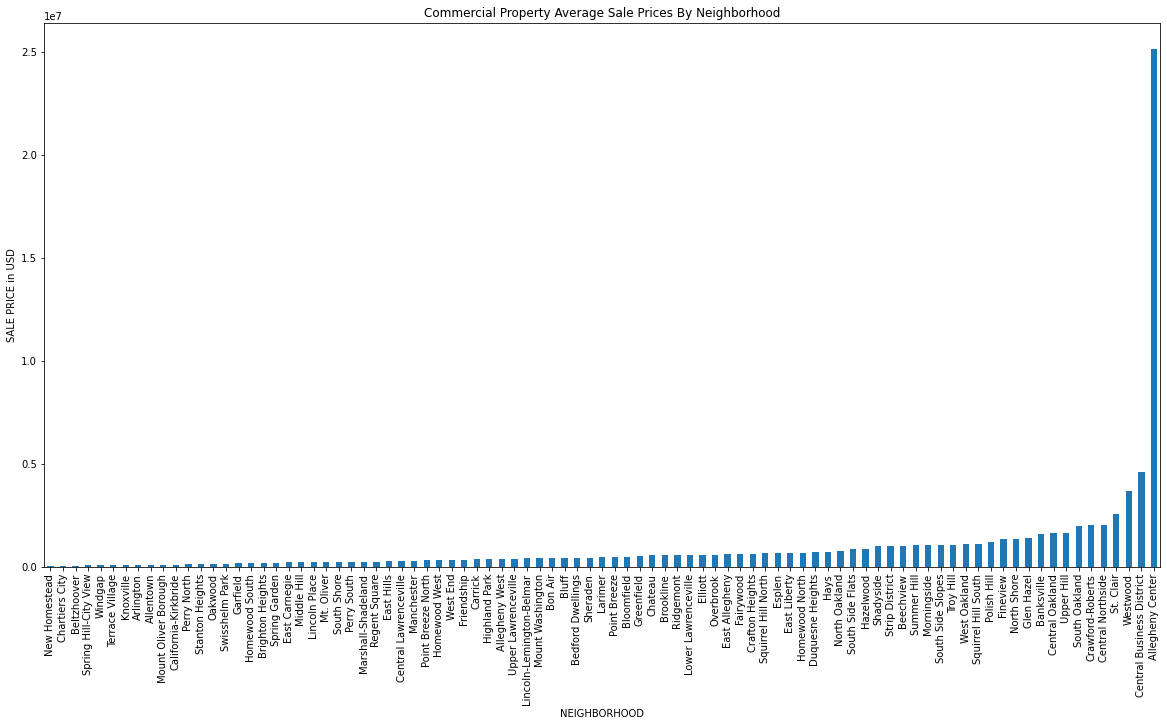

Cheapest 10 Residential neighborhoods:


NEIGHBORHOOD
Bedford Dwellings    14462.571429
Homewood West        15148.539095
Beltzhoover          15228.766716
Larimer              20049.363636
Esplen               23882.435115
Homewood North       25559.764208
Fairywood            25707.715789
East Hills           25765.192982
Knoxville            26936.936667
Hays                 27090.121495
Name: SALEPRICE, dtype: float64

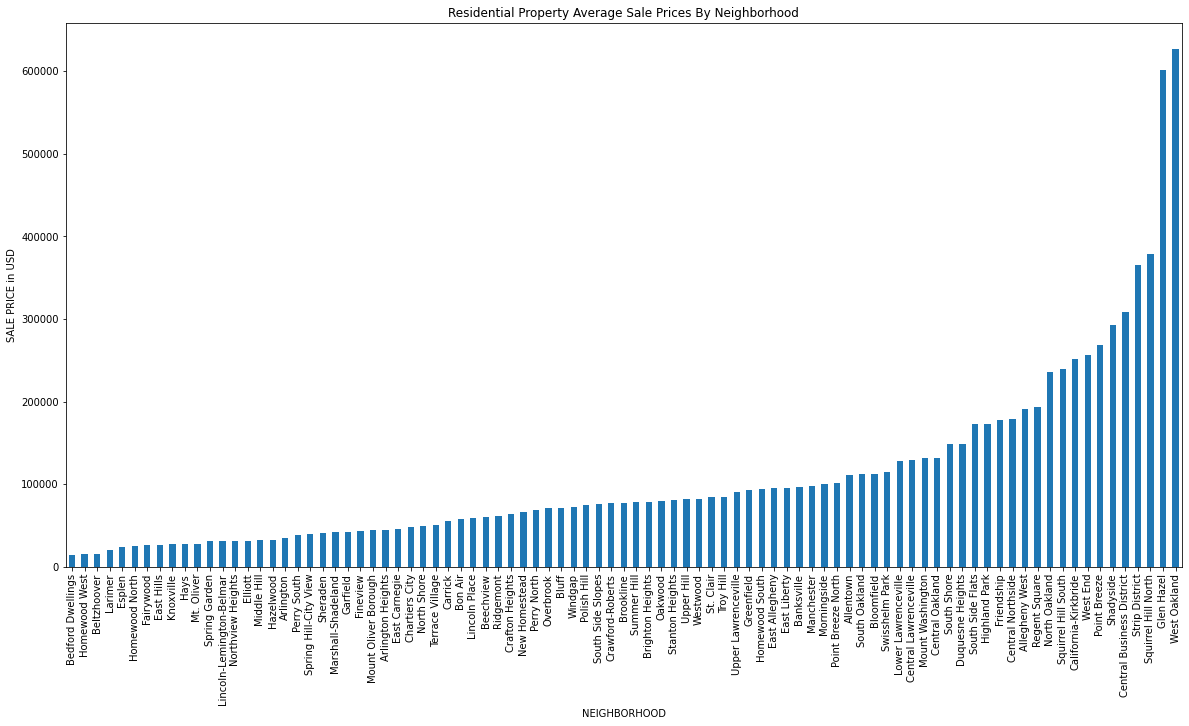

In [28]:
#print number of data points for each neighborhood
print("Original Data Counts:")
value_counts = property_data['NEIGHBORHOOD'].value_counts()
print("value counts \n",value_counts)

#get rid of love&affection sales (transferring property to family/ friends for a much lower price)
love_mask = property_data['SALEDESC']=='LOVE&AFFECTION'
edited_property_data = property_data.mask(love_mask)

#get rid of sale prices <=10000 dollars, to get rid of government sales, other outliers
price_mask = edited_property_data['SALEPRICE'] <= 1500 #these are the values we are removing
edited_property_data = edited_property_data.mask(price_mask)

#remove NaN neighborhoods
edited_property_data = edited_property_data[edited_property_data['NEIGHBORHOOD'].notnull()]

#isolate the two property types we are focusing
type_commercial_mask = edited_property_data['CLASSDESC']=='COMMERCIAL'
type_residential_mask = edited_property_data['CLASSDESC']=='RESIDENTIAL'
commercial_data = edited_property_data[type_commercial_mask]
residential_data = edited_property_data[type_residential_mask]

#new value counts:
print("\n Residential value counts: ")
value_counts = residential_data['NEIGHBORHOOD'].value_counts()
print("value counts \n",value_counts)

#commercial sorting and graph
#group by neighborhood
commercial_data = commercial_data.groupby('NEIGHBORHOOD').mean()

#sort ascending
commercial_data_sorted = commercial_data['SALEPRICE'].sort_values(ascending=True)
#bar graph
plt.title("Commercial Property Average Sale Prices By Neighborhood")
plt.ylabel("SALE PRICE in USD")
commercial_bar_plot = commercial_data_sorted.plot.bar(figsize = (20,10))
plt.show()

#residential sorting and graph
#group by neighborhood
residential_data = residential_data.groupby('NEIGHBORHOOD').mean()

#sort ascending
residential_data_sorted = residential_data['SALEPRICE'].sort_values(ascending=True)
#bar graph
plt.title("Residential Property Average Sale Prices By Neighborhood")
plt.ylabel("SALE PRICE in USD")
residential_data_sorted.plot.bar(figsize = (20,10))

#We are looking for the cheapest housing, so:
#bottom ten:
print("Cheapest 10 Residential neighborhoods:")
#print(residential_data_sorted)
residential_data_sorted.head(10)


Now, we will take the above data, and plot it to a geographical map, for both residential and commercial.

Text(0.5, 1.0, 'Commercial Property Average Sale Prices Geo Map')

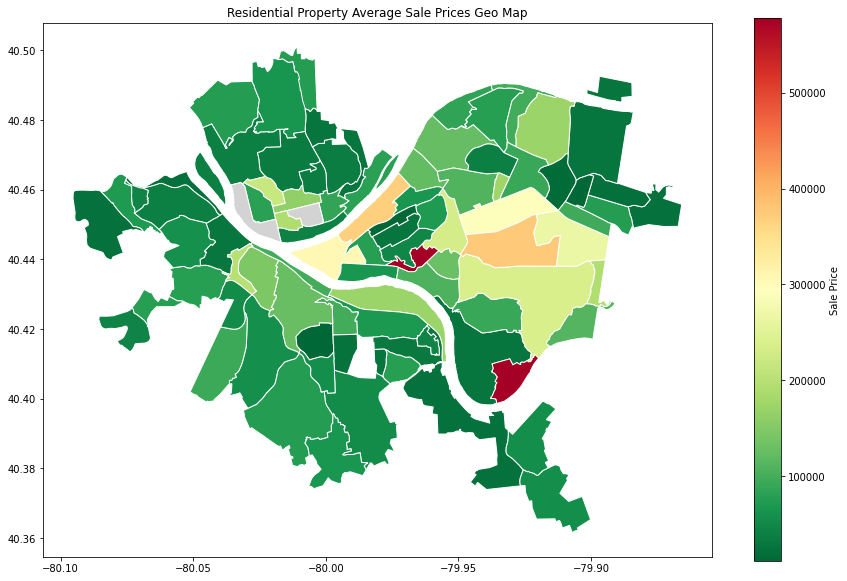

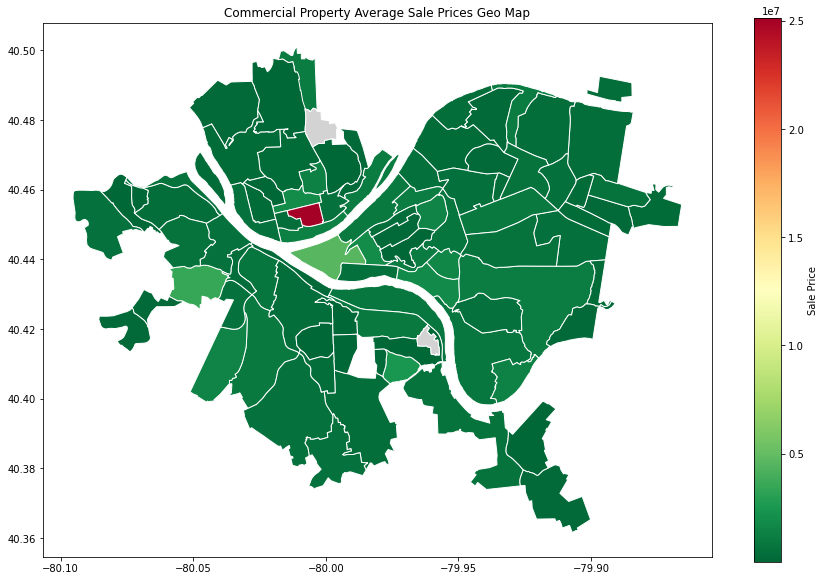

In [6]:
#Geopandas:
neighborhoods_geo = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

residential_map = neighborhoods_geo.merge(residential_data["SALEPRICE"], how='left', left_on='hood', right_on='NEIGHBORHOOD')
residential_map[['hood',"SALEPRICE",'geometry']]
residential_map.plot(column='SALEPRICE', 
                     cmap=plt.cm.get_cmap('RdYlGn').reversed(), 
                     edgecolor="white", 
                     legend=True, 
                     legend_kwds={'label': "Sale Price"}, 
                     figsize=(15, 10), 
                     missing_kwds={"color": "lightgrey"}) 
plt.title("Residential Property Average Sale Prices Geo Map")

commercial_map = neighborhoods_geo.merge(commercial_data["SALEPRICE"], how='left', left_on='hood', right_on='NEIGHBORHOOD')
commercial_map[['hood',"SALEPRICE",'geometry']]
commercial_map.plot(column='SALEPRICE', 
                    cmap=plt.cm.get_cmap('RdYlGn').reversed(), 
                    edgecolor="white", 
                    legend=True, 
                    legend_kwds={'label': "Sale Price"}, 
                    figsize=(15, 10), 
                    missing_kwds={"color": "lightgrey"}) 
plt.title("Commercial Property Average Sale Prices Geo Map")



## Property Data Conclusion:
    

The three cheapest residential neighborhoods are as follows:

| Neighborhod       | Price |
| -----------       | ----------- |
| Bedford Dwellings | 14462.571429|
| Homewood West     | 15148.539095|
| Beltzhoover       | 15228.766716|

Therefore, our superhero should settle down in Bedford Dwellings, as it is the best neighborhood because it is the cheapest to live there.